In [1]:
import numpy as mp
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier - Классификатор К ближайших соседей

In [3]:
import pandas as pd
%matplotlib inline

In [5]:
#Генератор разбиения. Раюбивает на обучение и валидацию
#Чтоб была хорошая перетасовка нужно задать shuffle=True
#Число блоков задается м параметре n_folds
from sklearn.cross_validation import KFold

In [6]:
#Вычисляет качество на всех разбиениях
#В estimator - передаеться классификатор
#В cv - передаеться генератор разбеения (KFold)
from sklearn.cross_validation import cross_val_score

In [7]:
#Для приведения всех признаков кодному масштабу
from sklearn.preprocessing import scale

In [51]:
wine = pd.read_csv('wine.data.txt', sep=',')

In [53]:
class_ar = mp.asarray(wine.iloc[:,0]) #Выбираем классы обьектов из 1-й строки

In [56]:
featch_ar = mp.asarray(wine.iloc[:,1:])#Выбираем признаки с 2 и до конца столбцов

In [58]:
scaled_data = scale(featch_ar) #Нормируем данные

In [65]:
n,m = scaled_data.shape #Берем размерность данных n - число обьектов, m - признаков

In [85]:
gen_split = KFold(n,n_folds=5, shuffle=True, random_state=42)
knc = KNeighborsClassifier(n_neighbors=5)
acc_ar = cross_val_score(knc, X=featch_ar, y=class_ar, cv=gen_split, scoring="accuracy")

In [86]:
print acc_ar

[ 0.66666667  0.63888889  0.8         0.68571429  0.74285714]


In [90]:
scores= []
mean_scores = []

In [91]:
for i in range(1,51):
    knc = KNeighborsClassifier(n_neighbors=i)
    acc_arr = cross_val_score(knc,X=featch_ar,y=class_ar,scoring='accuracy', cv=gen_split)
    print acc_arr
    print i,round(acc_arr.mean(),5)
    scores.append(acc_arr)
    mean_scores.append(round(acc_arr.mean(),5))

[ 0.69444444  0.63888889  0.82857143  0.71428571  0.8       ]
1 0.73524
[ 0.69444444  0.66666667  0.74285714  0.57142857  0.65714286]
2 0.66651
[ 0.66666667  0.66666667  0.85714286  0.62857143  0.77142857]
3 0.7181
[ 0.61111111  0.61111111  0.77142857  0.57142857  0.68571429]
4 0.65016
[ 0.66666667  0.63888889  0.8         0.68571429  0.74285714]
5 0.70683
[ 0.63888889  0.69444444  0.74285714  0.62857143  0.74285714]
6 0.68952
[ 0.72222222  0.63888889  0.8         0.71428571  0.74285714]
7 0.72365
[ 0.66666667  0.61111111  0.77142857  0.71428571  0.74285714]
8 0.70127
[ 0.66666667  0.58333333  0.82857143  0.68571429  0.77142857]
9 0.70714
[ 0.72222222  0.61111111  0.65714286  0.65714286  0.74285714]
10 0.6781
[ 0.66666667  0.58333333  0.71428571  0.71428571  0.74285714]
11 0.68429
[ 0.66666667  0.61111111  0.68571429  0.68571429  0.74285714]
12 0.67841
[ 0.72222222  0.61111111  0.77142857  0.74285714  0.74285714]
13 0.7181
[ 0.72222222  0.63888889  0.74285714  0.74285714  0.74285714]
1

In [97]:
import os

In [103]:
os.chdir('D:\Leon Projects\Python')

In [104]:
m = max(mean_scores)
idx = mean_scores.index(m)

In [113]:
txt = open('sub1_1.txt','w')
#txt.write('%s 0.73' % (idx+1,m))
txt.write('%s' % (idx+1))
txt.close()

In [114]:
txt = open('sub1_2.txt','w')
txt.write('%0.2f' % m)
txt.close()

In [120]:
scores = []
mean_scores = []
for i in range(1,51):
    knc = KNeighborsClassifier(n_neighbors=i)
    acc_arr = cross_val_score(knc,X=scaled_data,y=class_ar,scoring='accuracy', cv=gen_split)
    scores.append(acc_arr)
    mean_scores.append(round(acc_arr.mean(),5))

In [121]:
m = max(mean_scores)
idx = mean_scores.index(m)

In [122]:
txt = open('sub1_3.txt','w')
#txt.write('%s 0.73' % (idx+1,m))
txt.write('%s' % (idx+1))
txt.close()

In [119]:
txt = open('sub1_4.txt','w')
txt.write('%0.2f' % m)
txt.close()

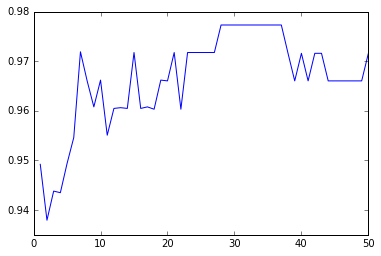

In [124]:
plt.plot(range(1,51),mean_scores)